In [1]:
from os import listdir
from os.path import isfile, join
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
import string
sns.set()
from collections import Counter
from scipy.stats import itemfreq
mypath = '.\\Geracao\\Transcrições\\'

In [2]:
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [3]:
onlyfiles  = list(filter(lambda x: '.txt' in x, onlyfiles))

In [4]:
stop_words = ['tá', 'ok', 'engie', 'lá', 'é', 'mais', 'oi', 'alô','então', 'pra', 'cara','tchau', 'unidade', 'bom', 'dia', 'sim', 'aí', 'vamos', 'aqui', 'obrigado', 'valeu', 'beleza', 'né', 'gente', 'bem', 'fala', 'exato', 'vai', 'certo', 'grupo', 'perfeito', 'fazer', 'ai', 'vou'] + nltk.corpus.stopwords.words('portuguese')

In [5]:
all_txt = ""
for txt in onlyfiles:
    f = open(mypath+txt, "r")
    x = f.read()
    x = x[x.find('\n'):]
    x = x.replace("\n"," ")
    x = x.replace("Locutor 2:","")
    x = x.replace("Locutor 1:","")
    x = x.strip()
    all_txt = all_txt + " "+ x
all_txt = all_txt.strip()
all_txt = all_txt.lower()

In [6]:
all_txt = all_txt.translate(str.maketrans('', '', string.punctuation))
all_txt = " ".join(list(filter(lambda x: x not in stop_words, all_txt.split())))

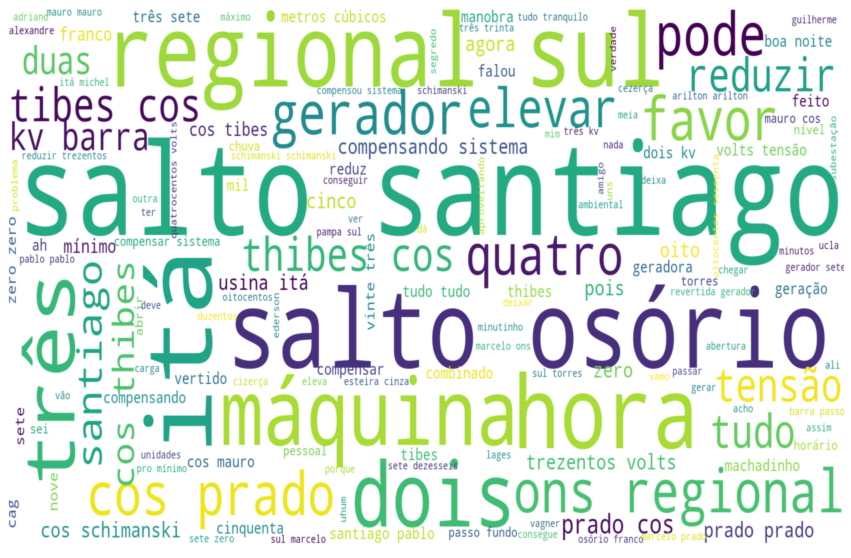

In [7]:
wordcloud = WordCloud(max_font_size=100, max_words=200, background_color="white", scale=5, stopwords = stop_words).generate(all_txt)
plt.figure(figsize = (15,10))
plt.imshow(wordcloud, interpolation='gaussian', aspect = 'auto')
plt.axis("off")
plt.show()

In [8]:
def ngram_list(n, word_list, stop_word_list=None):
        """
        Generate ngrams with width n excluding those that are entirely formed of stop words

        Args:
            n (int): i.e. 1, 2, 3...
            word_list (list of str): list of words
            stop_word_list (list of str, Optional): list of words that should be excluded while obtaining
                                                    list of ngrams

        Returns:
            list of str: List of ngrams formed from the given word list except for those that have all their tokes in
                         stop words list
        """
        stop_word_set = set(stop_word_list) if stop_word_list else []
        all_ngrams = nltk.ngrams(word_list, n)
        ngram_list = []
        for ngram in all_ngrams:
            lowered_ngram_tokens = map(lambda token: token.lower(), ngram)
            if any(token not in stop_word_set for token in lowered_ngram_tokens):
                ngram_list.append(' '.join(ngram))
        return ngram_list 
two_gram = ngram_list(2, all_txt.split(" "))
three_gram = ngram_list(3, all_txt.split(" "))

In [9]:
Counter(two_gram).most_common()

[('salto santiago', 64),
 ('salto osório', 45),
 ('regional sul', 39),
 ('ons regional', 34),
 ('cos prado', 33),
 ('thibes cos', 27),
 ('tibes cos', 27),
 ('cos thibes', 21),
 ('prado cos', 20),
 ('kv barra', 20),
 ('compensando sistema', 20),
 ('usina itá', 19),
 ('trezentos volts', 19),
 ('prado prado', 17),
 ('cos schimanski', 17),
 ('cos tibes', 17),
 ('santiago pablo', 16),
 ('volts tensão', 15),
 ('boa noite', 14),
 ('dois kv', 14),
 ('cos mauro', 14),
 ('três sete', 12),
 ('zero zero', 12),
 ('metros cúbicos', 12),
 ('vinte três', 12),
 ('tudo tudo', 12),
 ('passo fundo', 12),
 ('mauro cos', 12),
 ('compensar sistema', 11),
 ('schimanski schimanski', 11),
 ('marcelo ons', 10),
 ('gerador salto', 10),
 ('revertida gerador', 10),
 ('três kv', 10),
 ('osório franco', 10),
 ('pablo pablo', 10),
 ('sete zero', 9),
 ('gerador sete', 9),
 ('tudo tranquilo', 9),
 ('reduzir trezentos', 9),
 ('sul torres', 8),
 ('barra passo', 8),
 ('quatrocentos volts', 8),
 ('compensou sistema', 8),
 (

In [10]:
Counter(three_gram).most_common()

[('ons regional sul', 33),
 ('thibes cos thibes', 21),
 ('cos prado prado', 17),
 ('tibes cos tibes', 17),
 ('prado cos prado', 16),
 ('salto santiago pablo', 15),
 ('dois kv barra', 11),
 ('cos schimanski schimanski', 10),
 ('salto osório franco', 10),
 ('santiago pablo pablo', 10),
 ('três sete zero', 9),
 ('marcelo ons regional', 9),
 ('reduzir trezentos volts', 9),
 ('regional sul torres', 8),
 ('gerador salto santiago', 8),
 ('três kv barra', 8),
 ('kv barra passo', 8),
 ('barra passo fundo', 8),
 ('cos mauro mauro', 8),
 ('usina itá michel', 7),
 ('regional sul marcelo', 7),
 ('kv barra salto', 7),
 ('barra salto osório', 7),
 ('pablo salto santiago', 7),
 ('quatrocentos volts tensão', 7),
 ('mauro cos mauro', 7),
 ('sul marcelo prado', 6),
 ('elevar três kv', 6),
 ('trezentos volts tensão', 6),
 ('tensão salto santiago', 6),
 ('vinte três trinta', 6),
 ('centro regional sul', 6),
 ('regional sul arilton', 6),
 ('sul arilton arilton', 6),
 ('itá compensando sistema', 6),
 ('tibes

In [11]:
Counter(all_txt.split()).most_common()

[('cos', 134),
 ('salto', 112),
 ('santiago', 101),
 ('prado', 86),
 ('itá', 78),
 ('três', 74),
 ('thibes', 63),
 ('tudo', 58),
 ('sete', 56),
 ('gerador', 56),
 ('osório', 56),
 ('tibes', 56),
 ('ons', 52),
 ('zero', 52),
 ('dois', 48),
 ('sul', 46),
 ('schimanski', 46),
 ('sistema', 42),
 ('mauro', 42),
 ('tensão', 41),
 ('regional', 40),
 ('favor', 36),
 ('pode', 36),
 ('pablo', 35),
 ('reduzir', 34),
 ('máquina', 34),
 ('compensando', 33),
 ('volts', 33),
 ('oito', 31),
 ('quatro', 29),
 ('trezentos', 27),
 ('elevar', 27),
 ('duas', 26),
 ('kv', 26),
 ('franco', 26),
 ('usina', 25),
 ('cinco', 24),
 ('compensar', 24),
 ('barra', 23),
 ('hora', 22),
 ('mínimo', 22),
 ('vinte', 20),
 ('agora', 19),
 ('torres', 19),
 ('marcelo', 19),
 ('cag', 19),
 ('arilton', 19),
 ('nove', 18),
 ('horas', 17),
 ('seis', 17),
 ('pois', 17),
 ('michel', 16),
 ('unidades', 16),
 ('boa', 15),
 ('nível', 15),
 ('feito', 15),
 ('passo', 15),
 ('machadinho', 15),
 ('deixa', 15),
 ('noite', 14),
 ('meia', 